## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

# Doğrusal Regresyon (Linear Regression)

🎯 Bu egzersizde, bir NBA oyuncusunun win rating (`win_rating`) performansını, oynadığı dakika (`mp`) gibi maç istatistiklerine göre modelleyeceksiniz.


👉 [NBA.csv](https://d32aokrjazspmn.cloudfront.net/materials/NBA.csv) dataset’ini bu notebook’a bir pandas dataframe olarak yükleyin ve ilk 5 satırını görüntüleyin.

In [12]:
import os
os.listdir()

['.gitignore',
 'tests',
 'Linear_Regression.ipynb',
 'Makefile',
 '.git',
 'README.md',
 '.ipynb_checkpoints']

In [13]:
df_nba = pd.read_csv("NBA.csv")
df_nba.head()

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


ℹ️ Dataset’in detaylı açıklamasını challenge README dosyasında bulabilirsiniz. Challenge boyunca buna mutlaka referans verin.


## 1. Özellik Setini ve Hedefi Tanımlayın (Define Feature Set and Target)

🎯 İlk hedef, oyuncuların akranlarına kıyasla genel performans puanı olan *Wins Above Replacement* (`win_rating`) değerini, oynadıkları dakika sayısına (`mp`) göre modellemektir.

👉 Bu iki değişkeni `X` ve `y` olarak atayın. `X`’in feature(lar), `y`’nin ise target olduğunu unutmayın.

In [18]:
X = df_nba[['mp']]        
y = df_nba['win_rating']

print(X.head())
print(y.head())

     mp
0  2409
1  2708
2  2407
3   585
4  2056
0     1.643091
1    10.808427
2     3.054773
3     0.230004
4     0.905614
Name: win_rating, dtype: float64


👉 Bir [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) kullanarak rating ile oynanan dakika sayısı arasındaki ilişkiyi görselleştirin.

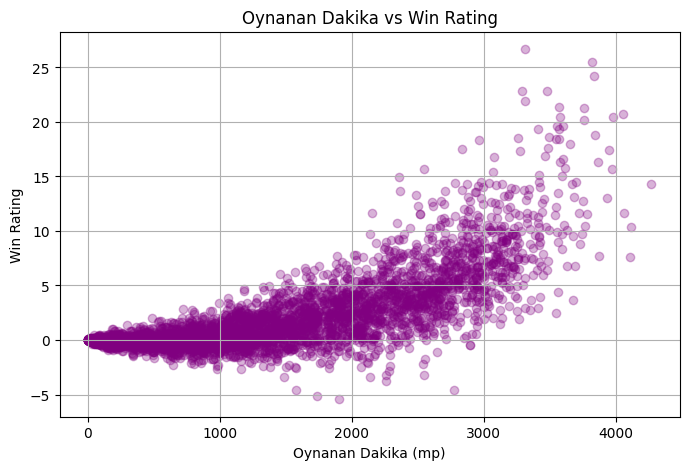

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='purple', alpha=0.3)
plt.title('Oynanan Dakika vs Win Rating')
plt.xlabel('Oynanan Dakika (mp)')
plt.ylabel('Win Rating')
plt.grid(True)
plt.show()

ℹ️ Scatter plot, aralarında bir ilişki olduğunu düşündürmeli. Ancak bu ilişki tamamen doğrusal mı? 🤔 Göreceğiz!

## 2. Çapraz Doğrulama (Cross-Validation)

👉 Sklearn’in [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) fonksiyonunu kullanarak, oyuncu performans rating’ini oynanan dakika sayısına göre tahmin eden bir [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) modeli üzerinde 5-fold cross-validation çalıştırın. Cross-validation’ın ham çıktısını `cv_results` adlı yeni bir değişkende saklayın.

In [28]:
model = LinearRegression()

cv_results = cross_validate(model, X, y, cv=5, scoring='r2', return_train_score=True)

print(cv_results)

{'fit_time': array([0.01676512, 0.00312757, 0.00189376, 0.00175619, 0.00190687]), 'score_time': array([0.00331664, 0.00186992, 0.00129128, 0.001369  , 0.00149655]), 'test_score': array([0.5555057 , 0.53447908, 0.53790391, 0.57658459, 0.57917762]), 'train_score': array([0.56003925, 0.56367302, 0.5653569 , 0.55561258, 0.55502215])}


❓ Cross-validation sonuçları içindeki en düşük skor nedir?  
Cevabınızı hesaplayın ve değeri `min_score` adlı yeni bir değişkende saklayın.

In [30]:
import numpy as np
min_score = np.min(cv_results['test_score'])

print(min_score)

0.5344790822272503


❓ Cross-validation sonuçları içindeki en yüksek skor nedir?  
Cevabınızı hesaplayın ve değeri `max_score` adlı yeni bir değişkende saklayın.

In [31]:
max_score = np.max(cv_results['test_score'])
print(max_score)

0.5791776193355004


❓ Cross-validation sonuçlarının ortalama skoru nedir?  
Cevabınızı hesaplayın ve değeri `mean_score` adlı yeni bir değişkende saklayın.

In [33]:
mean_score = np.mean(cv_results['test_score'])
print(mean_score)

0.556730180006891


ℹ️ Cross-validation çalıştırırken, model performansının en sağlam ve en temsil edici değerlendirmesi olarak her zaman ortalama skora bakarız.

### ☑️ Kodunu Test Et

In [34]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'cv_results',
    cv_result = cv_results,
    mean_score = mean_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-9.0.2, pluggy-1.6.0 -- /home/demet/.pyenv/versions/3.12.9/bin/python3.12
cachedir: .pytest_cache
rootdir: /home/demet/S16D1-S-data-linear-regression/tests
plugins: anyio-4.12.1, dash-4.0.0
collecting ... collected 2 items

test_cv_results.py::TestCvResults::test_cv_mean PASSED                   [ 50%]
test_cv_results.py::TestCvResults::test_cv_results PASSED                [100%]

============================== 2 passed in 0.16s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master



🤔 **Şimdi K-fold sayısının `K` (yani `cross_validate()` içindeki `cv` parametresi) etkisini inceleyelim**

👉 `K` değeri 2’den 20’ye çıkarken **<u>toplam</u> hesaplama süresinin (fit + score)** ve **<u>ortalama</u> skorun** nasıl değiştiğini plot edin.

<details>
  <summary markdown='span'><strong>İpucu</strong></summary>

  1. `K` değerlerini, hesaplama sürelerini ve cv ortalama skorlarını saklamak için 3 liste oluşturun.
  1. 2’den 20’ye kadar `K` değerleri üzerinde döngü kurun ve her seferinde:
     1. Cross-validation çalıştırın.
     1. `fit_time` ve `score_time` toplamını, toplam süreler listenize ekleyin.
     1. Ortalama `test_score` değerini, cv ortalama skorları listenize ekleyin.
  1. İki adet plot oluşturun:
     1. `K`’ye karşı toplam süre.
     1. `K`’ye karşı ortalama skor.
</details>


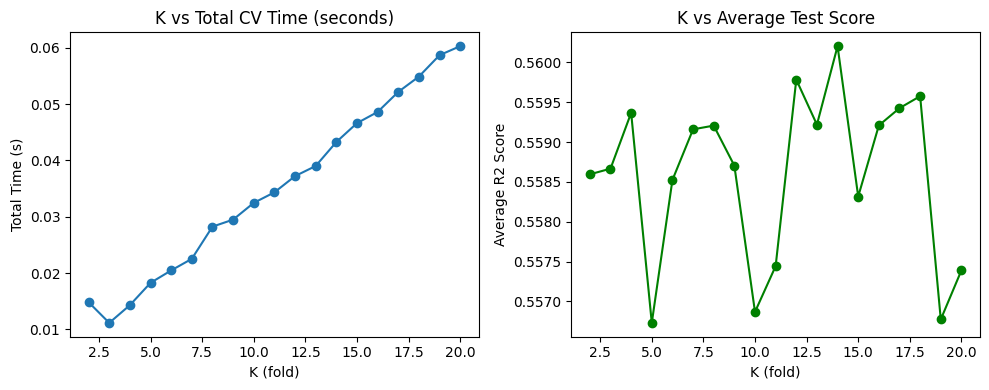

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import numpy as np


K_values = list(range(2, 21))
total_times = []
avg_scores = []


model = LinearRegression()


for K in K_values:
    cv_results = cross_validate(model, X, y, cv=K, scoring='r2', return_train_score=False)
    # toplam süre = fit + score
    total_time = np.sum(cv_results['fit_time']) + np.sum(cv_results['score_time'])
    total_times.append(total_time)
    # ortalama test score
    avg_score = np.mean(cv_results['test_score'])
    avg_scores.append(avg_score)


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K_values, total_times, marker='o')
plt.title('K vs Total CV Time (seconds)')
plt.xlabel('K (fold)')
plt.ylabel('Total Time (s)')


plt.subplot(1,2,2)
plt.plot(K_values, avg_scores, marker='o', color='green')
plt.title('K vs Average Test Score')
plt.xlabel('K (fold)')
plt.ylabel('Average R2 Score')

plt.tight_layout()
plt.show()

ℹ️ $R^2$ skorunun sabit kaldığını görmelisiniz; bu, modelin hem daha küçük hem de daha büyük test setlerinde benzer performans gösterdiğinin iyi bir işaretidir. Buna karşılık, hesaplama süresi artmaya devam eder. Bu nedenle, pratik bir kural olarak genellikle K = 10’un üzerine çıkmayız.

## 3. Modeli eğit (Train the Model)

Cross-validation, veri seti üzerinde varsayımsal bir modeli değerlendirmek için kullanılır. Seçtiğiniz fold sayısı kadar modeli birden fazla kez eğitir; her seferinde verinin farklı bir alt kümesi üzerinde eğitilir ve kalan veriyle skor hesaplanır. Bu süreç bize, modelin ne kadar iyi performans gösterebileceğini gösteren cross-validated bir skor verir.

Ancak modeli gerçek anlamda tahmin yapmak için kullanmak istediğinizde, mümkün olduğunca fazla veriyle eğitmeyi tercih edersiniz. Yani verinin bir kısmını ayırmadan.

👉 Modeli, tam `X` ve `y` üzerinde eğitin (model skorunu zaten doğruladık, şimdi tahmin için kullanacağız). Eğitilmiş modeli `model` adlı değişkende saklayın.

In [36]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()

model.fit(X, y)



,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


❓ Eğitilmiş modelinizin eğimi (slope) ya da katsayısı (coefficient) nedir?  
Bu değere modelin attribute’ları üzerinden erişebilirsiniz. Eğimi `slope` adlı bir değişkende saklayın.

In [37]:

slope = model.coef_[0]

print("Modelin eğimi (slope):", slope)

Modelin eğimi (slope): 0.002602579938640193


❓ Eğitilmiş modelinizin intercept (sabit terim) değeri nedir?  
Bu değere modelin attribute’ları üzerinden erişebilirsiniz. Intercept değerini `intercept` adlı bir değişkende saklayın.

In [38]:

intercept = model.intercept_

print("Modelin intercept (sabit terim) değeri:", intercept)

Modelin intercept (sabit terim) değeri: -1.5463749371639444


🤔 Devam etmeden önce bu katsayıları nasıl yorumlayacağınızı anladığınızdan emin olun.

### ☑️ Kodunu Test Et

In [39]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'trained_model',
    slope = slope,
    intercept = intercept
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-9.0.2, pluggy-1.6.0 -- /home/demet/.pyenv/versions/3.12.9/bin/python3.12
cachedir: .pytest_cache
rootdir: /home/demet/S16D1-S-data-linear-regression/tests
plugins: anyio-4.12.1, dash-4.0.0
collecting ... collected 2 items

test_trained_model.py::TestTrainedModel::test_intercept PASSED           [ 50%]
test_trained_model.py::TestTrainedModel::test_slope PASSED               [100%]

============================== 2 passed in 0.14s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master



## 4. Tahmin (Predict)

👉 Eğitilmiş modelinizi kullanarak toplamda 1000 dakika oynamış bir oyuncunun performans rating’ini tahmin edin.  
Tahmin edilen değeri `prediction` adlı bir değişkende saklayın.

In [43]:
import pandas as pd
from nbresult import ChallengeResult


new_datapoint = pd.DataFrame({"mp": [1000]})


prediction_array = model.predict(new_datapoint)
prediction = prediction_array[0]  # Tek değer


result = ChallengeResult(
    'prediction',
    prediction=prediction
)

result.write()
print(result.check())


print("1000 dakika oynayan oyuncunun tahmini win_rating'i:", prediction)


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-9.0.2, pluggy-1.6.0 -- /home/demet/.pyenv/versions/3.12.9/bin/python3.12
cachedir: .pytest_cache
rootdir: /home/demet/S16D1-S-data-linear-regression/tests
plugins: anyio-4.12.1, dash-4.0.0
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction PASSED               [100%]

============================== 1 passed in 0.14s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master

1000 dakika oynayan oyuncunun tahmini win_rating'i: 1.0562050014762487


### ☑️ Kodunu Test Et

In [44]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'prediction',
    prediction = prediction
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-9.0.2, pluggy-1.6.0 -- /home/demet/.pyenv/versions/3.12.9/bin/python3.12
cachedir: .pytest_cache
rootdir: /home/demet/S16D1-S-data-linear-regression/tests
plugins: anyio-4.12.1, dash-4.0.0
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction PASSED               [100%]

============================== 1 passed in 0.12s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



## 5.  Daha Fazla Özellik ile Modeli İyileştirme (Improving the Model with More Features)

NBA fantasy league’i seven bir arkadaşınız size bazı içgörülerle geliyor 🏀

Bir oyuncunun *Wins Above Replacement* rating’ini değerlendirirken, genellikle topa sahip olma sayısına (`poss`), savunma/hücum oranına (`do_ratio`) ve `pacing` değerine de baktıklarını söylüyor.

❓ Aşağıdaki hücreyi çalıştırarak bu yeni feature’lar ile `win_rating` arasındaki korelasyonu görselleştirin.  
Yukarıdaki feature’lardan **hangisini** modelinize eklemeyi düşünürdünüz?

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))

plt.subplots_adjust(left=0.5, right=2)

sns.regplot(data=df, y='win_rating', x='poss', ax=axes[0], scatter_kws={'alpha':0.5})
sns.regplot(data=df, y='win_rating', x='do_ratio', ax=axes[1], scatter_kws={'alpha':0.5})
sns.regplot(data=df, y='win_rating', x='pacing', ax=axes[2], scatter_kws={'alpha':0.5})

plt.show()

<details>
  <summary markdown='span'><strong>Cevap</strong></summary>

  Feature’ları manuel olarak seçecek olsaydınız, hedef değişken olan `win_rating` ile en yüksek korelasyona sahip olanlarla başlardınız.

  Regresyon plot’larına baktığımızda, geriye `poss` ve `do_ratio` kalıyor. Sayısal değerleri görmek isterseniz `df.corr()[['win_rating']]` çıktısına bakabilirsiniz.

  Peki neden `poss` değil? Sonuçta `win_rating` ile olan korelasyonu `do_ratio`’dan daha yüksek.

  Bir de şuna bakın: `sns.scatterplot(data=df, x='mp', y='poss');`. Nedenini görebiliyor musunuz?

  <details>
  <summary><strong>Cevap</strong></summary>

  Görünen o ki, ilk feature’ımız olan `mp` ile `poss` neredeyse mükemmele yakın şekilde korelasyonlu. Bu yüzden `poss`, modele çok az ek değer katacaktır.

  </details>

</details>

Şimdi, iki feature kullanan modelin (seçtiğiniz yeni feature ve `mp`) bir oyuncunun rating’ini tahmin etmede ilk modelimizden daha iyi olup olmadığına bakalım.

👉 İki sütunlu bir DataFrame olacak şekilde yeni bir feature set’i oluşturun.

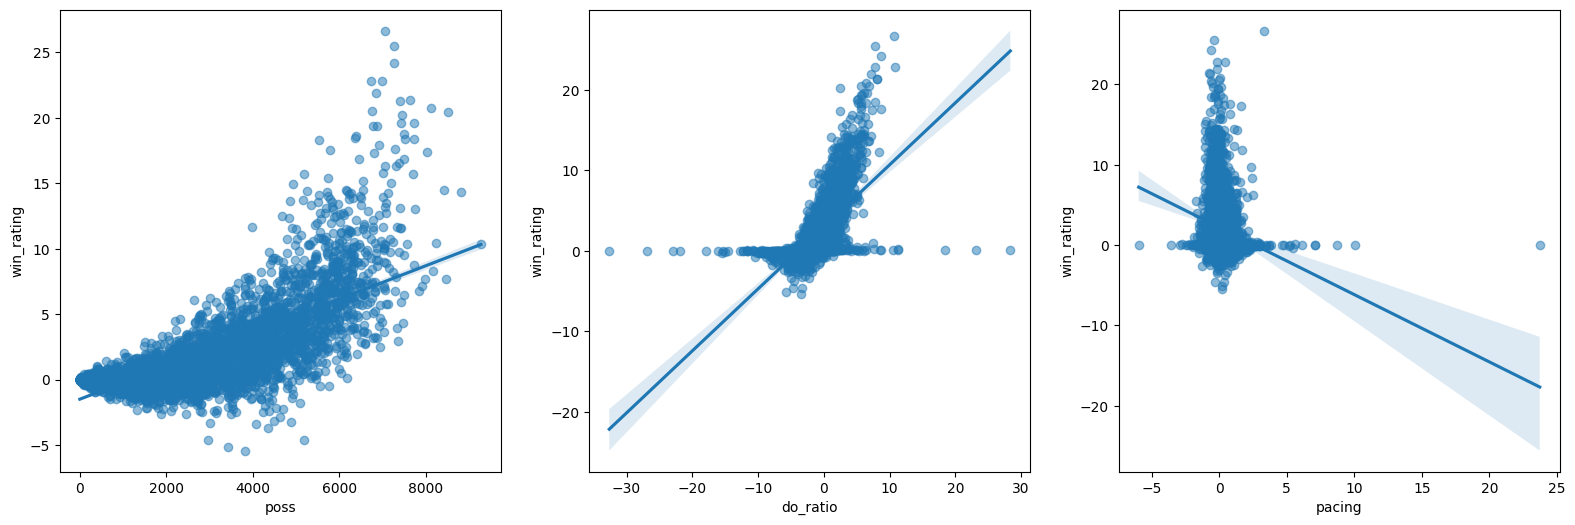

,win_rating
season,-0.042861
poss,0.742017
mp,0.748268
do_ratio,0.666120
pacing,-0.202611
win_rating,1.000000


In [48]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))
plt.subplots_adjust(left=0.5, right=2)

sns.regplot(data=df_nba, y='win_rating', x='poss', ax=axes[0], scatter_kws={'alpha':0.5})
sns.regplot(data=df_nba, y='win_rating', x='do_ratio', ax=axes[1], scatter_kws={'alpha':0.5})
sns.regplot(data=df_nba, y='win_rating', x='pacing', ax=axes[2], scatter_kws={'alpha':0.5})

plt.show()

df_nba.corr()[['win_rating']]


👉 Şimdi yeni bir linear regression modeli için cross-validation çalıştırın ve **ortalama** skoru `mean_2_feat_score` değişkenine kaydedin.

> Not: Eğer sadece cross-validation skoruyla ilgileniyorsanız (hesaplama süreleriyle değil), sklearn’in [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) fonksiyonunu kullanabilirsiniz.

In [ ]:
# SENİN KODUN BURAYA

### ☑️ Kodunu Test Et

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'improved_score',
    improved_score = mean_2_feat_score
)

result.write()
print(result.check())

$R^2$ değerinizde **yaklaşık %8’lik bir artış** görmelisiniz 👏

Tebrikler, ilk manuel *feature selection* işleminizi gerçekleştirdiniz — bu hafta bunun daha birçok yolunu göreceğiz!

🤔 Peki Linear Regression ile yapabileceğimiz en iyi şey bu mu? Bir sonraki challenge’da bunu daha derinlemesine keşfedelim!

# 🏁